# Yao 


- Import the necessary Yao packages

In [2]:
begin
	using Pkg
	Pkg.activate(mktempdir())
	Pkg.Registry.update()
	Pkg.add("Yao")
	Pkg.add("YaoPlots")
	Pkg.add("StatsBase")
	Pkg.add("Plots")
	Pkg.add("BitBasis")
end

  Activating new project at `/var/folders/82/9_h72ksj75n463kms2b_yf8c0000gq/T/jl_k5iQ4z`
    Updating registry at `~/.julia/registries/General.toml`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `/private/var/folders/82/9_h72ksj75n463kms2b_yf8c0000gq/T/jl_k5iQ4z/Project.toml`
  [5872b779] + Yao v0.8.9
    Updating `/private/var/folders/82/9_h72ksj75n463kms2b_yf8c0000gq/T/jl_k5iQ4z/Manifest.toml`
  [79e6a3ab] + Adapt v3.6.1
  [4fba245c] + ArrayInterface v7.4.3
  [50ba71b6] + BitBasis v0.8.1
  [a921213e] + CacheServers v0.2.0
  [d360d2e6] + ChainRulesCore v1.15.7
  [9e997f8a] + ChangesOfVariables v0.1.6
  [34da2185] + Compat v4.6.1
  [9a962f9c] + DataAPI v1.14.0
  [864edb3b] + DataStructures v0.18.13
  [ffbed154] + DocStringExtensions v0.9.3
  [d4d017d3] + ExponentialUtilities v1.24.0
  [46192b85] + GPUArraysCore v0.1.4
  [c145ed77] + GenericSchur v0.5.3
  [3587e190] + InverseFunctions v0.1.8
  [92d709cd] + IrrationalConstants v

   Resolving package versions...
    Updating `/private/var/folders/82/9_h72ksj75n463kms2b_yf8c0000gq/T/jl_k5iQ4z/Project.toml`
  [2913bbd2] + StatsBase v0.33.21
  No Changes to `/private/var/folders/82/9_h72ksj75n463kms2b_yf8c0000gq/T/jl_k5iQ4z/Manifest.toml`
   Resolving package versions...
    Updating `/private/var/folders/82/9_h72ksj75n463kms2b_yf8c0000gq/T/jl_k5iQ4z/Project.toml`
  [91a5bcdd] + Plots v1.38.10
    Updating `/private/var/folders/82/9_h72ksj75n463kms2b_yf8c0000gq/T/jl_k5iQ4z/Manifest.toml`
  [d1d4a3ce] + BitFlags v0.1.7
  [944b1d66] + CodecZlib v0.7.1
  [35d6a980] + ColorSchemes v3.20.0
  [c3611d14] + ColorVectorSpace v0.9.10
  [d38c429a] + Contour v0.6.2
  [59287772] + Formatting v0.4.2
  [28b8d3ca] + GR v0.72.1
  [42e2da0e] + Grisu v1.0.2
  [cd3eb016] + HTTP v1.7.4
  [83e8ac13] + IniFile v0.5.1
  [1019f520] + JLFzf v0.1.5
  [682c06a0] + JSON v0.21.4
  [23fbe1c1] + Latexify v0.15.19
  [e6f89c97] + LoggingExtras v1.0.0
  [739be429] + MbedTLS v1.1.7
  [442fdcdd] + Me

In [3]:
using Yao, YaoPlots

- First create a histogram function to represent measurements

In [4]:
begin
	using StatsBase: Histogram, fit
	using Plots: bar, scatter!, gr; gr()
	using BitBasis
	function plotmeasure(x::Array{BitStr{n,Int},1}) where n
		hist = fit(Histogram, Int.(x), 0:2^n)
		x = 0
		if(n<=3)
			s=8
		elseif(n>3 && n<=6)
			s=5
		elseif(n>6 && n<=10)
			s=3.2
		elseif(n>10 && n<=15)
			s=2
		elseif(n>15)
			s=1
		end
		bar(hist.edges[1] .- 0.5, hist.weights, legend=:none, size=(600*(2^n)/s,400), ylims=((-1,maximum(hist.weights))), xlims=((-1,2^n)), grid=:false, ticks=false, border=:none, color=:lightblue, lc=:lightblue)
		scatter!(0:2^n-1, ones(2^n,1), markersize=0,
         series_annotations="|" .* string.(hist.edges[1]; base=2, pad=n) .* "⟩")
		scatter!(0:2^n-1, zeros(2^n,1) .+ maximum(hist.weights), markersize=0,
         series_annotations=string.(hist.weights))
	end
end

plotmeasure (generic function with 1 method)


## First Bell State

## 1/sqrt(2) * ( |00⟩ + |11⟩ )

- Define the quantum circuit
- Plot the circuit

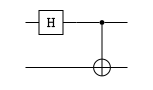

In [5]:
begin
	bellcircuit = chain(2, put(1=>H), control(1, 2=>X))
	plot(bellcircuit)
end

- Set up the two qubits to be sent into the circuit

In [6]:
q1 = ArrayReg(bit"00") #creating the system of two qubits with state |00>.

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

- View the state vector of the two qubits

In [7]:
state(q1) #state of a qubit in vector form

4×1 Matrix{ComplexF64}:
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

- Send the qubits into the circuit

In [8]:
a = (q1 |> bellcircuit) #Passing the qubit q1 through the bell circuit

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

- Now look at the resulting statevector

In [9]:
state(a)

4×1 Matrix{ComplexF64}:
 0.7071067811865475 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im
 0.7071067811865475 + 0.0im

- Meassure the state "nshots" times

In [10]:
measuredqubits = a |> r->measure(r, nshots=1024)

1024-element Vector{DitStr{2, 2, Int64}}:
 00 ₍₂₎
 00 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 00 ₍₂₎
 11 ₍₂₎
 00 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
      ⋮
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 00 ₍₂₎
 11 ₍₂₎
 00 ₍₂₎

- Plot the resulting states

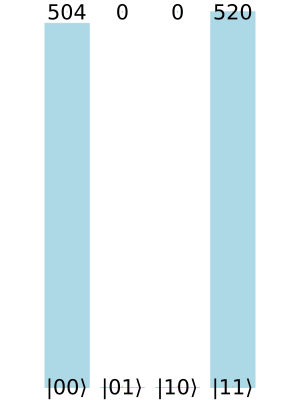

In [11]:
plotmeasure(measuredqubits)


## Second Bell State

## 1/sqrt(2) * ( |01⟩ + |10⟩ )

- Define the quantum circuit
- Plot the circuit

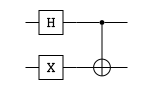

In [12]:
begin
	bellcircuit = chain(2, put(1=>H), put(2=>X),control(1, 2=>X))
	plot(bellcircuit)
end

- Set up the two qubits to be sent into the circuit

In [13]:
q1 = ArrayReg(bit"00") #creating the system of two qubits with state |00>.

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

- View the state vector of the two qubits

In [14]:
state(q1) #state of a qubit in vector form

4×1 Matrix{ComplexF64}:
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

- Send the qubits into the circuit

In [15]:
a = (q1 |> bellcircuit) #Passing the qubit q1 through the bell circuit

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

- Now look at the resulting statevector

In [16]:
state(a)

4×1 Matrix{ComplexF64}:
                0.0 + 0.0im
 0.7071067811865475 + 0.0im
 0.7071067811865475 + 0.0im
                0.0 + 0.0im

- Meassure the state "nshots" times

In [17]:
measuredqubits = a |> r->measure(r, nshots=1024)

1024-element Vector{DitStr{2, 2, Int64}}:
 10 ₍₂₎
 01 ₍₂₎
 01 ₍₂₎
 10 ₍₂₎
 10 ₍₂₎
 01 ₍₂₎
 01 ₍₂₎
 01 ₍₂₎
 10 ₍₂₎
 01 ₍₂₎
 01 ₍₂₎
 01 ₍₂₎
 10 ₍₂₎
      ⋮
 01 ₍₂₎
 10 ₍₂₎
 10 ₍₂₎
 01 ₍₂₎
 10 ₍₂₎
 10 ₍₂₎
 10 ₍₂₎
 01 ₍₂₎
 10 ₍₂₎
 01 ₍₂₎
 01 ₍₂₎
 01 ₍₂₎

- Plot the resulting states

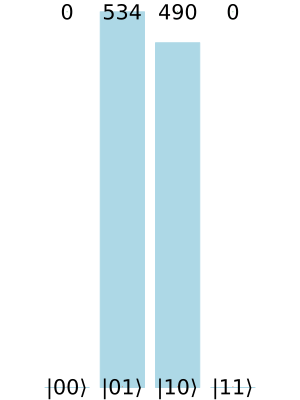

In [18]:
plotmeasure(measuredqubits)


## Third Bell State

## 1/sqrt(2) * ( |00⟩ - |11⟩ )

- Define the quantum circuit
- Plot the circuit

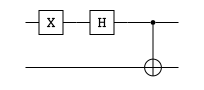

In [19]:
begin
	bellcircuit = chain(2, put(1=>X),put(1=>H), control(1, 2=>X))
	plot(bellcircuit)
end

- Set up the two qubits to be sent into the circuit

In [20]:
q1 = ArrayReg(bit"00") #creating the system of two qubits with state |00>.

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

- View the state vector of the two qubits

In [21]:
state(q1) #state of a qubit in vector form

4×1 Matrix{ComplexF64}:
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

- Send the qubits into the circuit

In [22]:
a = (q1 |> bellcircuit) #Passing the qubit q1 through the bell circuit

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

- Now look at the resulting statevector

In [23]:
state(a)

4×1 Matrix{ComplexF64}:
  0.7071067811865475 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
 -0.7071067811865475 + 0.0im

- Meassure the state "nshots" times

In [24]:
measuredqubits = a |> r->measure(r, nshots=1024)

1024-element Vector{DitStr{2, 2, Int64}}:
 00 ₍₂₎
 11 ₍₂₎
 00 ₍₂₎
 00 ₍₂₎
 00 ₍₂₎
 00 ₍₂₎
 11 ₍₂₎
 00 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 00 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
      ⋮
 11 ₍₂₎
 11 ₍₂₎
 00 ₍₂₎
 00 ₍₂₎
 11 ₍₂₎
 11 ₍₂₎
 00 ₍₂₎
 11 ₍₂₎
 00 ₍₂₎
 00 ₍₂₎
 11 ₍₂₎
 00 ₍₂₎

- Plot the resulting states

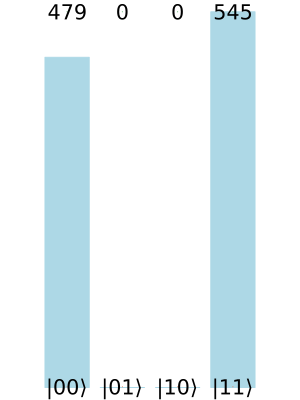

In [25]:
plotmeasure(measuredqubits)


## Fourth Bell State

## 1/sqrt(2) * ( |01⟩ - |10⟩ )

- Define the quantum circuit
- Plot the circuit

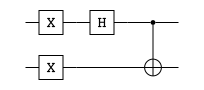

In [27]:
begin
	bellcircuit = chain(2, put(1=>X),put(1=>H),put(2=>X), control(1, 2=>X))
	plot(bellcircuit)
end

- Set up the two qubits to be sent into the circuit

In [28]:
q1 = ArrayReg(bit"00") #creating the system of two qubits with state |00>.

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

- View the state vector of the two qubits

In [29]:
state(q1) #state of a qubit in vector form

4×1 Matrix{ComplexF64}:
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

- Send the qubits into the circuit

In [30]:
a = (q1 |> bellcircuit) #Passing the qubit q1 through the bell circuit

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

- Now look at the resulting statevector

In [31]:
state(a)

4×1 Matrix{ComplexF64}:
                 0.0 + 0.0im
 -0.7071067811865475 + 0.0im
  0.7071067811865475 + 0.0im
                 0.0 + 0.0im

- Meassure the state "nshots" times

In [32]:
measuredqubits = a |> r->measure(r, nshots=1024)

1024-element Vector{DitStr{2, 2, Int64}}:
 10 ₍₂₎
 10 ₍₂₎
 10 ₍₂₎
 01 ₍₂₎
 10 ₍₂₎
 01 ₍₂₎
 10 ₍₂₎
 01 ₍₂₎
 01 ₍₂₎
 01 ₍₂₎
 10 ₍₂₎
 01 ₍₂₎
 10 ₍₂₎
      ⋮
 10 ₍₂₎
 01 ₍₂₎
 10 ₍₂₎
 10 ₍₂₎
 01 ₍₂₎
 10 ₍₂₎
 10 ₍₂₎
 01 ₍₂₎
 01 ₍₂₎
 10 ₍₂₎
 01 ₍₂₎
 10 ₍₂₎

- Plot the resulting states

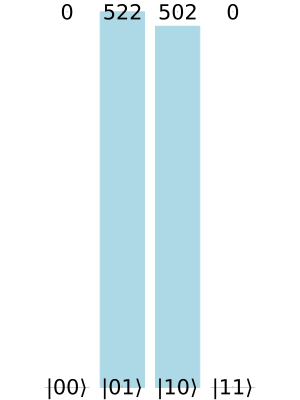

In [33]:
plotmeasure(measuredqubits)